In [249]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import * 
import time

In [251]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [252]:
value_function_employment(model.par, model.par.w, -1 )

11.115792447355036

In [253]:
unemployed_ss(model.par,1)
# R: Bør vi ikke være lidt bekymrede over, at value function er negativ?

(0.038201145888910826, -245.34631895700176)

In [254]:
search_effort = solve_search_effort(model.par)
print(np.shape(search_effort))


(2, 49)


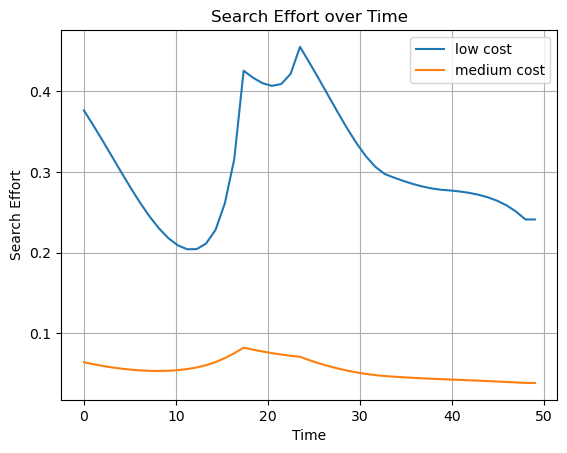

In [255]:

time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
#plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


In [256]:
sim = sim_search_effort(model.par)

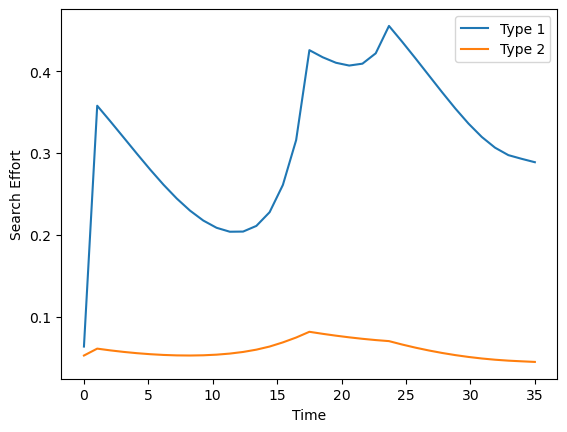

In [257]:
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
for i in range(sim.shape[0]):  # Loop through each type
    plt.plot(time, sim[i], label=f'Type {i+1}')  # Plot search efforts for each type
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.show()

In [258]:
# time = np.linspace(0, model.par.T_sim, model.par.T_sim)
# plt.plot(time, sim, label = 'low cost') 
# plt.xlabel('Time')
# plt.ylabel('Search Effort')
# plt.title('Search Effort over Time')
# plt.grid(True)
# plt.legend()
# plt.show()


In [259]:
from estimation import *

In [260]:
est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 35 is different from 2)

In [ ]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0000
Parameters:              0.041, 1.926, 363.974, 363.972
Number of iterations:    478


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


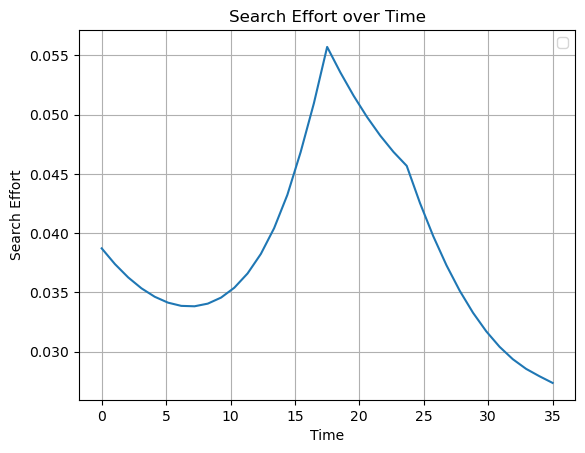

In [ ]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()
